In [1]:
import pandas as pd
import numpy as np
import string
import nltk
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud

In [2]:
# load the dataset
ElonMusk=pd.read_csv('Elon_musk.csv')
ElonMusk.drop(['Unnamed: 0'],inplace=True,axis=1)
ElonMusk

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
#Data Cleaning

In [4]:
ElonMusk=[Text.strip() for Text in ElonMusk.Text] # remove both the leading and the trailing characters
ElonMusk=[Text for Text in ElonMusk if Text] # removes empty strings, because they are considered in Python as False
ElonMusk=' '.join([i for i in ElonMusk if i]) 
# printing list after removing trailing char & empty strings then storing into one string
# ' '.join() for storing into one string
# [i for...] for printing list after removing trailing char
ElonMusk

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [5]:
#Joining the list into one string/text
# ElonMusk_text=' '.join(ElonMusk)
# ElonMusk_text

In [6]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
ElonMusk=' '.join(tknzr.tokenize(ElonMusk))
# printing list after removing usernames then storing into one string
# ' '.join() for storing into one string
# [tknzr.tokenize(ElonMusk)] for printing list after removing usernames
print(ElonMusk)

I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the

In [7]:
#Using Maketrans to remove Punctuations etc
# news1 = news.translate(str.maketrans('', '', string.punctuation))

In [8]:
ElonMusk=ElonMusk.translate(str.maketrans('','', string.punctuation))
ElonMusk

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway tog

In [9]:
# remove https or url within text
import re
ElonMusk=re.sub(r'http\S+', '', ElonMusk)
ElonMusk

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well

In [10]:
#removing numbers within text
ElonMusk = re.sub(r'[0-9]+', '', ElonMusk)
ElonMusk

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account UF UF This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well  Starlink wil

In [11]:
len(ElonMusk)

99178

In [12]:
#Tokennization with Lemmatizer

In [13]:
wordnet = nltk.stem.WordNetLemmatizer()
wordnet

<WordNetLemmatizer>

In [14]:
Tokens = nltk.tokenize.word_tokenize(ElonMusk)
Tokens

['I',
 '’',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'It',
 '’',
 's',
 'getting',
 'real',
 'Bought',
 'some',
 'Dogecoin',
 'for',
 'lil',
 'X',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'He',
 'definitely',
 '

In [15]:
# Tokens count
len(Tokens)

17997

In [16]:
#Importing Stop Words
with open("D:/Data-Science/Assignment/Text Mining/stop.txt","r") as pw:
    Stop_words = pw.read().split("\n")
Stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [17]:
#Removing stopwords
tokens_without_sw = [word for word in Tokens if not word in Stop_words]
tokens_without_sw

['I',
 '’',
 'alien',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'Great',
 'interview',
 'Doge',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'year',
 'Now',
 'Happy',
 'New',
 'Year',
 'Ox',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'fail',
 'Himself',
 'Haha',
 'Indeed',
 'Tweets',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'Just',
 'Just',
 'agree',
 'Clubhouse',
 'It',
 '’',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'He',
 'issues',
 'sentencing',
 'bit',
 'high',
 'Thanks',
 'fixing',
 'Please',
 'unlock',
 'account',
 'UF',
 'UF',
 'This',
 'true',
 'power',
 'haha',
 'Any',
 'crypto',
 'wallet',
 'won',
 '’',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'Your',
 'app',
 'sucks',
 'RT',
 'NASA',
 'selected',
 'Falcon',
 'Heavy',
 'launch',
 'elements',
 'lunar',
 'Gateway',
 'mission',
 'Yes',
 'Once',
 'predict',
 'cash',
 'flow',

In [18]:
len(tokens_without_sw)

10910

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(tokens_without_sw)
text_tf

<10910x3640 sparse matrix of type '<class 'numpy.float64'>'
	with 9762 stored elements in Compressed Sparse Row format>

In [20]:
#Creating DataFrame

In [21]:
feature_names = tf.get_feature_names_out()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)
df

,aber,abo,aboard,abort,about,above,absence,absolute,absolutely,absorb,...,your,yup,zealand,zenit,zeroes,zeros,zip,zon,zone,ðogecoin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
word_list = ' '.join(df)
word_list

'aber abo aboard abort about above absence absolute absolutely absorb absorption absurd absurdly ac academia accel accelera accelerate accelerated accelerating acceleration accelerator accept acceptable accepted access accessible accidental accidents accommodating account accura accuracy accurate ace achieve achieved achievement achieving achy acquisition action active activity actual actuall actually actuaries adagio add added adding additive addressed administered adults advanc advance advanced advantage adventure advertising advice advised aero afb affair affects affordable africa after afternoon age ages ago agony agree agreed ah ahead ahem ai aim aiming air aircraft airplane airplanes ak aka alert alexander algo algorithm algorithms alien aliens aligned all allocati allocation allowed allowing alloy almost aloha alpha already also altho although altit altitude alto aluminum am amaze amazing amazon america american amount amounts amplification amplitudes an analog analysis anasisii

In [23]:
#Positive words
with open("D:/Data-Science/Assignment/Text Mining/positive-words.txt","r") as pw:
    Positive_words = pw.read().split("\n")
Positive_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

In [24]:
#Printing the Positive words present in Csv File
txt_pos = ' '.join([i for i in df  if i in Positive_words])
txt_pos

'accessible accurate achievement advanced advantage affordable amaze amazing appealing appreciated approval approve attractive autonomous award awesome beautiful best better blessing boost brave bright calm capability capable catchy champion cherish classic clear clearly competitive confident congratulations conveniently cool correct creative cute destiny distinction ease easier easy efficient efficiently energetic enough entertaining excellent exceptional exceptionally excited excitement exciting fabulous fair fairly fast faster fastest favor favorite fine fortunately free freedom fresh fun futuristic gaining genius glad glorify good grateful great greatest happiness happy helpful helping hilarious honor honored hot humor important impressive improve improved improvement improvements improves improving incredible incredibly individualized insightful inspiration inspiring instrumental integrated intelligence interesting interests leads love loved lover loves luck magic magical masterpi

In [25]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos)

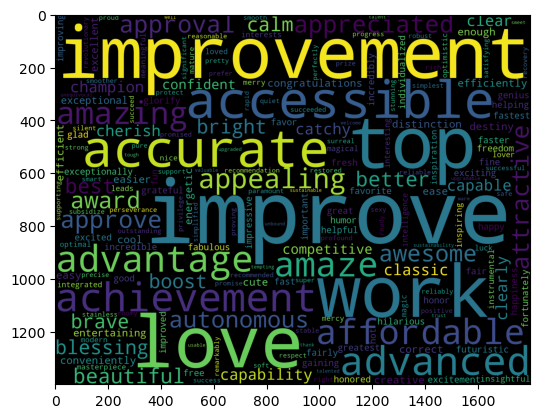

In [26]:
plt.imshow(wordcloud_pos)

In [27]:
#Negative Words
with open("D:/Data-Science/Assignment/Text Mining/negative-words.txt","r") as pw:
    Negative_words = pw.read().split("\n")
Negative_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an o

In [28]:
#Printing the Negative words present in Csv File
txt_neg = ' '.join([i for i in df  if i in Negative_words])
txt_neg

'abort absence absurd absurdly accidental agony annoying apologists attack attacks bad bankrupt begging bias blow bogus bombard boring break broke broken bs bug bugs bumps burn burned burns challenging cloudy cold collapse complex complicated confess confusion corrosion costly crash crazy critical damaged damn danger dead death decline dense destroyer die died difficult difficulties difficulty dire dirt discord distract drag dumb dust embarrassing embarrassingly emergency error excruciating excuse fail failed failing fails failure fall falling fallout false farcical fat fatigue fault faults fear fever fiction fist fool foolish frozen funny grief grumpy hang hard hasty hate hates haunt hazard hedge hell hurt hypocrisy ignore impossible inaccurate incorrect incorrectly inevitable inflationary insane insanely intense irony irrational issue issues joke junkyard knife knock latency lengthy limit limited loses losing loss lost louder ludicrous lurch madness marginal misleading mistake moron 

In [29]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg)

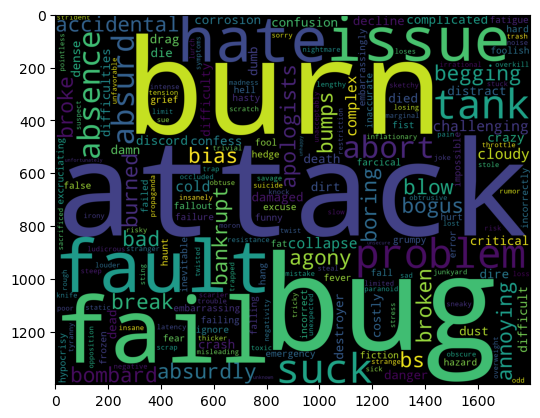

In [30]:
plt.imshow(wordcloud_neg)

In [31]:
#Emotional Mining 

In [32]:
Affin = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
Affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [33]:
Affinity_scores=Affin.set_index('word')['value'].to_dict()
Affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [34]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=Affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [35]:
ElonMusk1=pd.read_csv("Elon_musk.csv")
ElonMusk1.drop(['Unnamed: 0'],inplace=True,axis=1)
ElonMusk1

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [36]:
# Calculating sentiment value for each sentence
ElonMusk1['sentiment_value']=ElonMusk1['Text'].apply(calculate_sentiment)
ElonMusk1['sentiment_value']

0       0
1       0
2       3
3      -1
4       4
       ..
1994   -3
1995    1
1996    0
1997    0
1998    2
Name: sentiment_value, Length: 1999, dtype: int64

In [37]:
ElonMusk1.sort_values(by='sentiment_value')

,Text,sentiment_value
186,"@naval [Some tyranny]. Also, the road to hell ...",-7
1015,@enn_nafnlaus There are sketchy edits to Tesla...,-6
1637,@TimothyBuffett @Teslarati Apart from failing ...,-6
1717,@Neuro_Skeptic They don’t fire all at once. So...,-6
1063,@tesladri @ChananBos @raytech247 @WholeMarsBlo...,-5
...,...,...
1357,Great trip to Germany. Support from government...,10
468,@picot_john @CyberpunkGame It’s a good to grea...,10
458,@teslaownerssv It will get absurdly good. Tesl...,10
1304,"One way or another, excitement guaranteed! Sup...",11


In [38]:
# Sentiment score of the whole review
ElonMusk1['sentiment_value'].describe()

count    1999.000000
mean        0.635318
std         1.725848
min        -7.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [39]:
# negative sentiment score of the whole review
ElonMusk1[ElonMusk1['sentiment_value']<=0]

,Text,sentiment_value
0,@kunalb11 I’m an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
3,@gtera27 Doge is underestimated,-1
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",-2
...,...,...
1992,AI symbiosis while u wait,0
1993,@vistacruiser7 @flcnhvy There’s some of that too,0
1994,"@flcnhvy True, it sounds so surreal, but the n...",-3
1996,@TeslaGong @PPathole Samwise Gamgee,0


In [40]:
# Positive sentiment score of the whole review
ElonMusk1[ElonMusk1['sentiment_value']>0]

,Text,sentiment_value
2,@joerogan @Spotify Great interview!,3
4,@teslacn Congratulations Tesla China for amazi...,4
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),2
9,The most entertaining outcome is the most likely,2
11,Just agree to do Clubhouse with @kanyewest,1
...,...,...
1987,@PPathole @IheartTesla For sure. This is both ...,3
1988,@redmercy Yes,1
1989,"@buzzindelhi Sorry, should hopefully be soon!",1
1995,@PPathole Make sure to read ur terms &amp; con...,1


In [41]:
# Adding index cloumn
ElonMusk1['index']=range(0,len(ElonMusk1))
ElonMusk1

,Text,sentiment_value,index
0,@kunalb11 I’m an alien,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,1
2,@joerogan @Spotify Great interview!,3,2
3,@gtera27 Doge is underestimated,-1,3
4,@teslacn Congratulations Tesla China for amazi...,4,4
...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",-3,1994
1995,@PPathole Make sure to read ur terms &amp; con...,1,1995
1996,@TeslaGong @PPathole Samwise Gamgee,0,1996
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0,1997


C:\Users\pirfa\AppData\Local\Temp\ipykernel_212\2862454943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ElonMusk1['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

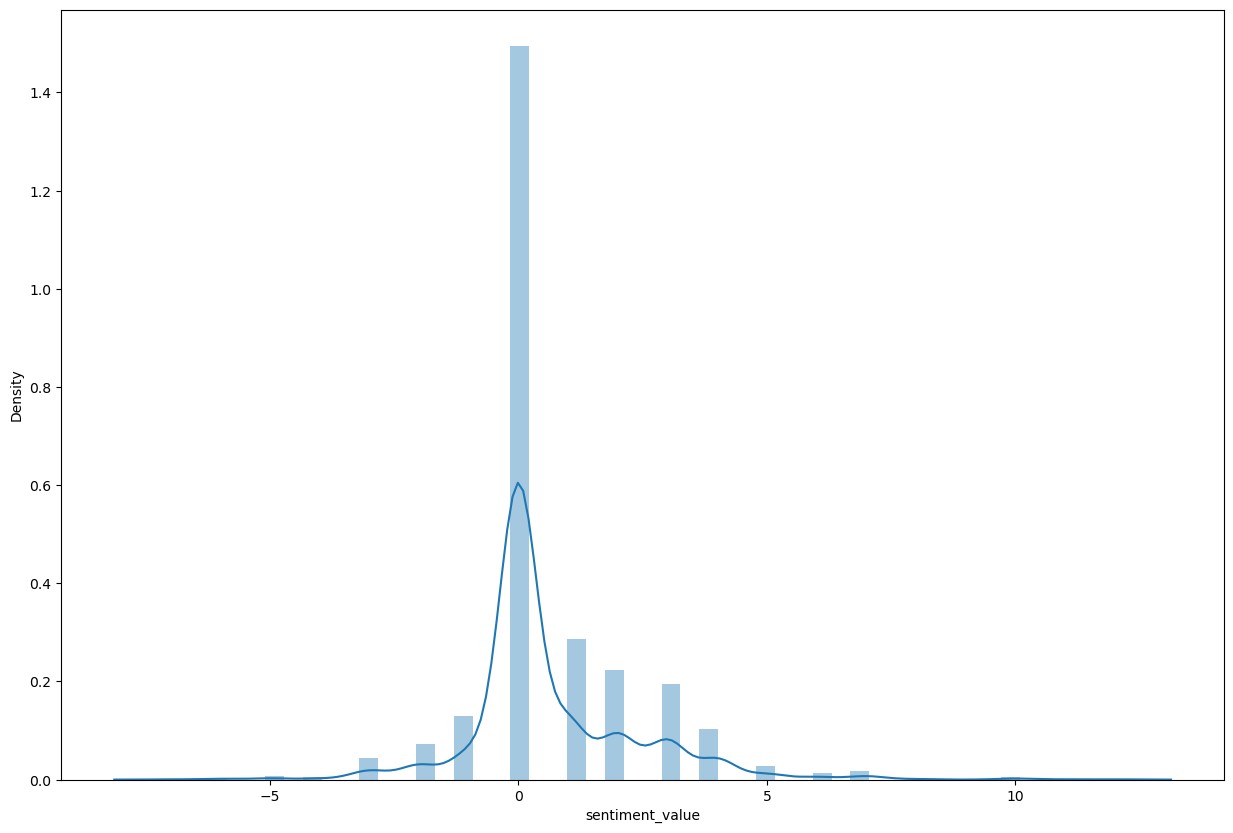

In [42]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(ElonMusk1['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

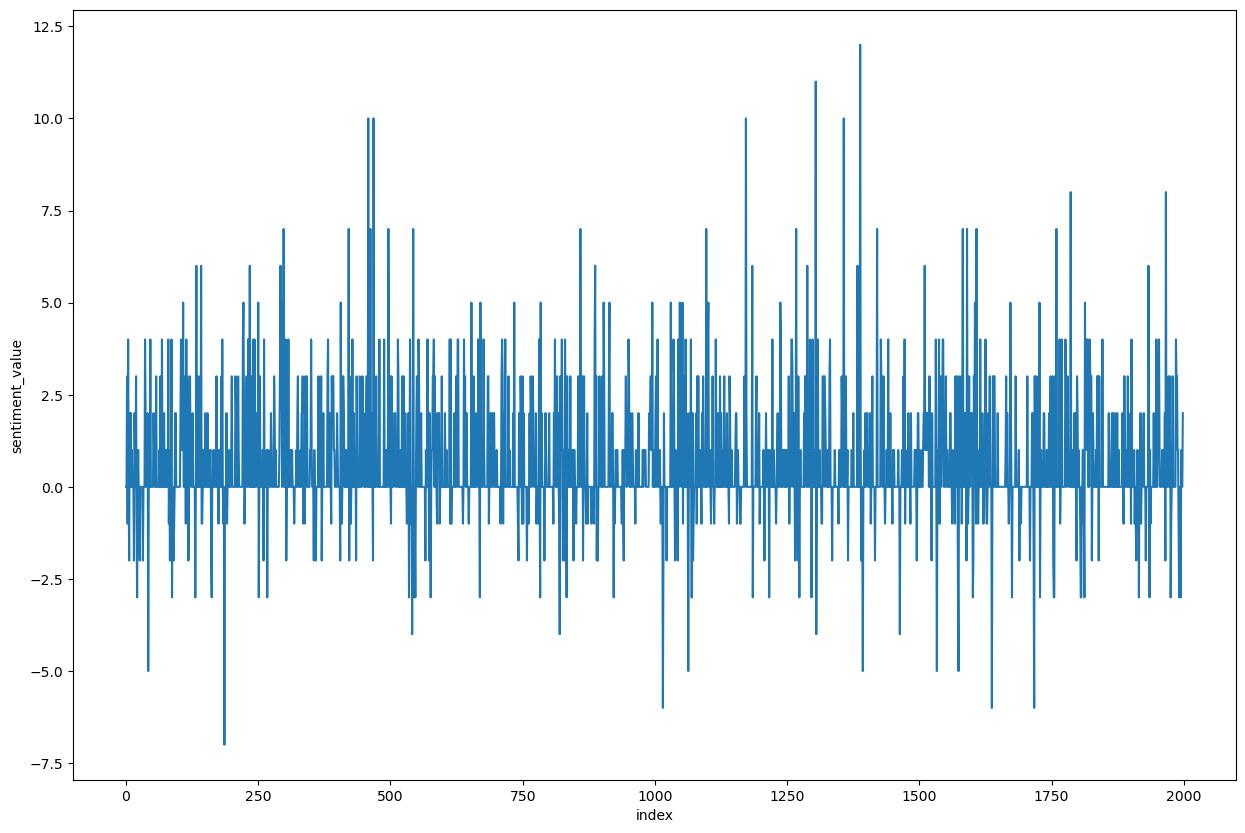

In [43]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=ElonMusk1)

# Conclusion

In [44]:
Pos_len=len(txt_pos)
Pos_len

1779

In [45]:
Neg_len=len(txt_neg)
Neg_len

1662

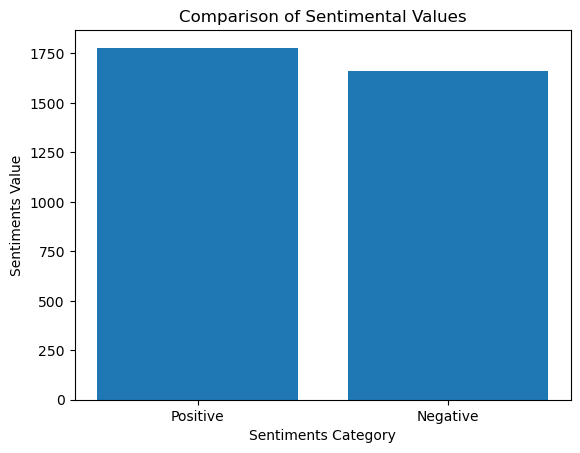

In [46]:
# Create a bar chart
plt.bar(['Positive', 'Negative'],[Pos_len,Neg_len])

# Customize the plot
plt.xlabel('Sentiments Category')
plt.ylabel('Sentiments Value')
plt.title('Comparison of Sentimental Values')

# Display the plot
plt.show()

In [47]:
# We can Conclude that there are more positive Sentiments than Negative Sentiments